binominal distribution  

*Припустимо, 1000 користувачів додали товари до кошика, а коефіцієнт конверсії до оформлення замовлення становить p=0,4. Використовуючи біноміальний розподіл, ми можемо оцінити ймовірність різних результатів (наприклад, наскільки ймовірно, що саме 400 користувачів перейдуть до оформлення замовлення)*

In [6]:
from scipy.stats import binom

n = 1000
p = 0.4
k = 400

prob = binom.pmf(k, n, p)
print(f"P(X = 400) = {prob:.4f}")


P(X = 400) = 0.0257


cumulative probability 

In [7]:
from scipy.stats import binom

n = 1000
p = 0.4

# Кумулятивна ймовірність до 399 включно
prob = 1 - binom.cdf(399, n, p)

print(f"P(X ≥ 400) = {prob:.4f}")


P(X ≥ 400) = 0.5120


beta-distribution:  
Як реальний приклад уявімо, що ви тестуєте нову функцію, і лише 10 користувачів увійшли в етап воронки. З них 3 конвертувалися. Спостережуваний коефіцієнт конверсії становить 3/10=0,3, але за такої малої вибірки є велика невизначеність.

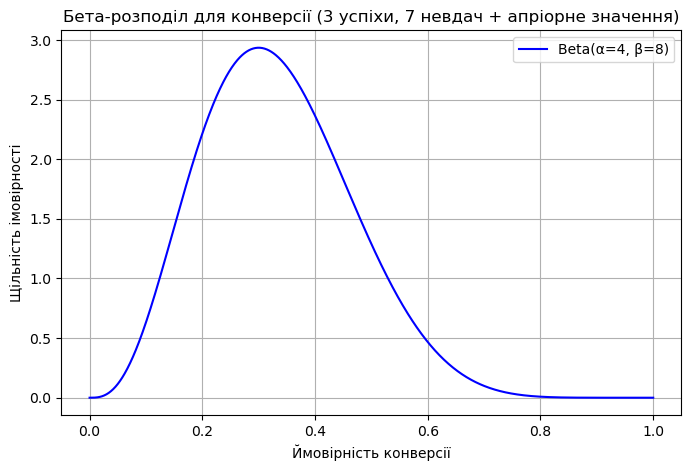

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Параметри бета-розподілу
alpha = 3 + 1
beta_param = 7 + 1

# Значення ймовірностей від 0 до 1
x = np.linspace(0, 1, 1000)

# Щільність ймовірності
y = beta.pdf(x, alpha, beta_param)

# Побудова графіка
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f'Beta(α={alpha}, β={beta_param})', color='blue')
plt.title('Бета-розподіл для конверсії (3 успіхи, 7 невдач + апріорне значення)')
plt.xlabel('Ймовірність конверсії')
plt.ylabel('Щільність імовірності')
plt.grid(True)
plt.legend()
plt.show()


survival analysis:  
Ви аналізуєте час, необхідний користувачам для завершення покупки після додавання товару до кошика. Використовуючи аналіз виживання, ви можете:

- *Оцінити ймовірність конверсії з часом.*
- *Виявити часові періоди з найвищими рівнями втрат.*
- *Тестувати втручання (наприклад, надсилання нагадувань), щоб зменшити втрати*

In [10]:
# create the data for practice
import pandas as pd
import numpy as np

# Генеруємо дані: 100 користувачів
np.random.seed(42)
n = 100

# Час до покупки (у годинах)
time_to_purchase = np.random.exponential(scale=10, size=n)

# Деякі користувачі не завершили покупку (цензурування)
# 1 = купив, 0 = не купив
purchased = np.random.binomial(1, 0.7, size=n)

# Створимо DataFrame
df = pd.DataFrame({
    'time': time_to_purchase,
    'event': purchased  # 1 = подія відбулася, 0 = цензуровано
})



Survival-функція (ймовірність НЕ завершити покупку до певного моменту)

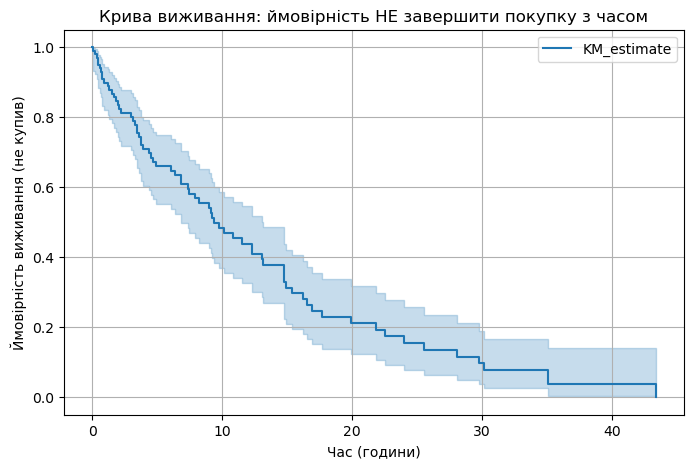

In [11]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
kmf.fit(durations=df['time'], event_observed=df['event'])

# Побудова графіка
plt.figure(figsize=(8, 5))
kmf.plot()
plt.title('Крива виживання: ймовірність НЕ завершити покупку з часом')
plt.xlabel('Час (години)')
plt.ylabel('Ймовірність виживання (не купив)')
plt.grid(True)
plt.show()

Порівняння двох груп (наприклад, з нагадуванням і без)

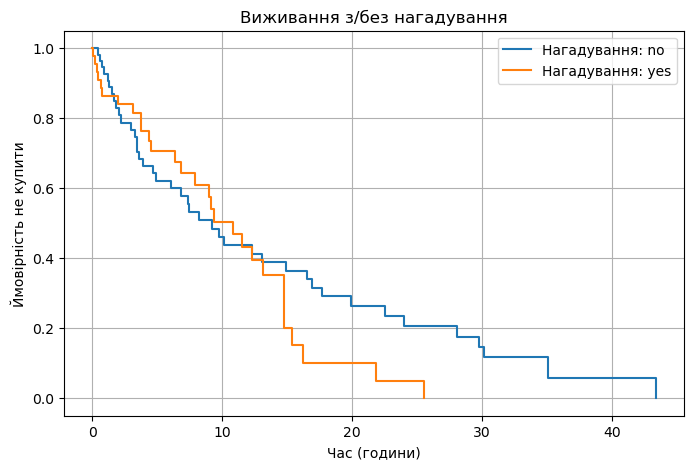

In [12]:
# Додамо колонку: чи отримав нагадування
df['reminder'] = np.random.choice(['yes', 'no'], size=n)

# Створимо дві підгрупи
group_yes = df[df['reminder'] == 'yes']
group_no = df[df['reminder'] == 'no']

# Побудуємо графіки для обох груп
plt.figure(figsize=(8, 5))

for label, group in df.groupby('reminder'):
    kmf.fit(durations=group['time'], event_observed=group['event'], label=f'Нагадування: {label}')
    kmf.plot(ci_show=False)

plt.title('Виживання з/без нагадування')
plt.xlabel('Час (години)')
plt.ylabel('Ймовірність не купити')
plt.grid(True)
plt.show()

In [13]:
# статистичне порівняння груп
from lifelines.statistics import logrank_test

results = logrank_test(
    group_yes['time'], group_no['time'],
    event_observed_A=group_yes['event'],
    event_observed_B=group_no['event']
)

results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.13 0.29      1.80